In [1]:
#Importing libraries
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd
from numpy import asarray
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import datetime
from statsmodels.tsa.tsatools import lagmat
from statsmodels.tsa.arima.model import ARIMA

In [1]:
%store -r df_cleaned

In [2]:
df_cleaned

,week,wPreis,Plz,full,date
date,,,,,
2020-09-14,2020-37,-37.519318,"['25', '24']",A2 - geschreddert,2020-09-14
2020-09-14,2020-37,-37.519318,"['25', '24']",A1 & A2 - geschreddert,2020-09-14
2020-09-14,2020-37,-23.445068,"['80', '81', '82', '83', '84', '85', '93', '94']",A3 - geschreddert,2020-09-14
2020-09-14,2020-37,-36.379163,"['70', '71', '73', '74', '75', '76']",A2 & A3 - geschreddert,2020-09-14
2020-09-14,2020-37,-27.983877,"['25', '24']",A2 & A3 - geschreddert,2020-09-14
...,...,...,...,...,...
2024-04-22,2024-17,7.216049,"['50', '51', '52', '53']",A2 & A3 - geschreddert,2024-04-22
2024-04-22,2024-17,33.349057,"['70', '71', '73', '74', '75', '76']",A2 & A3 - geschreddert,2024-04-22
2024-04-22,2024-17,2.409250,"['25', '24']",A2 - geschreddert,2024-04-22


Extracting one cluster from the dataset for analysis.

In [14]:
TS1 = df[(df['Plz'] == "['25', '24']")]

And from this cluster, extracting one category for analysis.

In [15]:
TS1_A2 = TS1[TS1['full'] == 'A2 -  geschreddert']

In [16]:
TS1_A1A2 = TS1[TS1['full'] == 'A1 & A2 -  geschreddert']
TS1_A2A3 = TS1[TS1['full'] == 'A2 & A3 -  geschreddert']

In [17]:
datasets = [TS1_A2, TS1_A1A2, TS1_A2A3]

# Plotting ACF and PACF

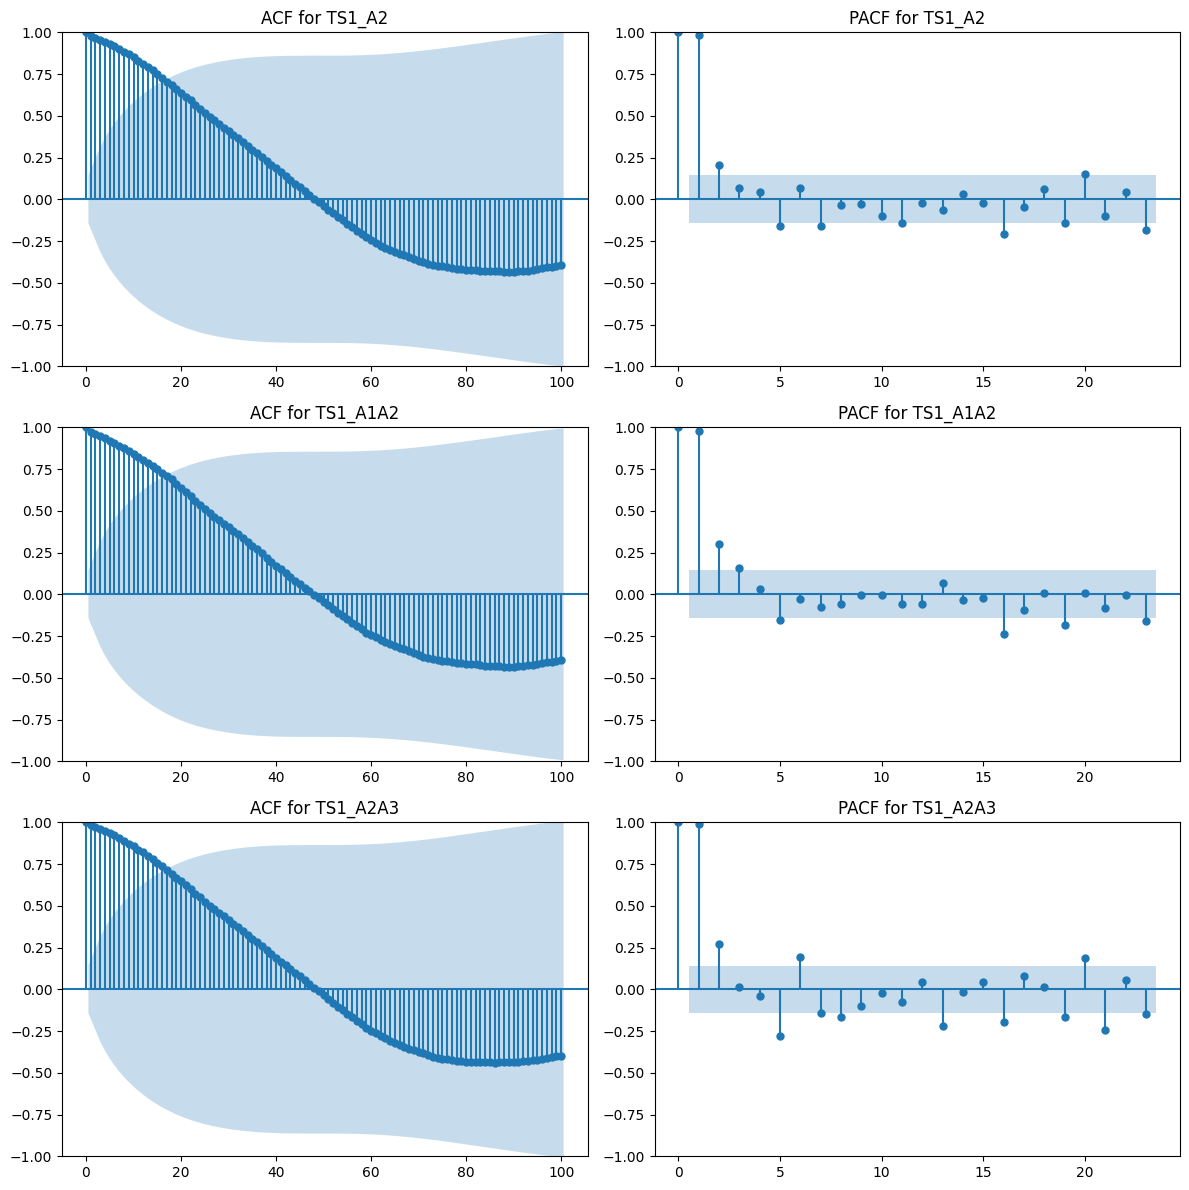

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# ACF and PACF for TS1_A2
plot_acf(TS1_A2['wPreis'], lags=100, ax=axes[0, 0])
axes[0, 0].set_title('ACF for TS1_A2')
plot_pacf(TS1_A2['wPreis'], ax=axes[0, 1])
axes[0, 1].set_title('PACF for TS1_A2')

# ACF and PACF for TS1_A1A2
plot_acf(TS1_A1A2['wPreis'], lags=100, ax=axes[1, 0])
axes[1, 0].set_title('ACF for TS1_A1A2')
plot_pacf(TS1_A1A2['wPreis'], ax=axes[1, 1])
axes[1, 1].set_title('PACF for TS1_A1A2')

# ACF and PACF for TS1_A2A3
plot_acf(TS1_A2A3['wPreis'], lags=100, ax=axes[2, 0])
axes[2, 0].set_title('ACF for TS1_A2A3')
plot_pacf(TS1_A2A3['wPreis'], ax=axes[2, 1])
axes[2, 1].set_title('PACF for TS1_A2A3')

plt.tight_layout()
plt.show()


- The ACF plots show that there is a positive correlation with the first 10-to-15 lags and it decreases backwards in time until it becomes less significant after around 15 weeks.

- The PACF plots show high correlation for 1 week lag but that is expected. Around 20 weeks, there seems to be a high partial autocorrelation. But we don't read too much into it as this "category" is also a combination of multiple categories.

# Seasonal Decomposition

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [21]:
def plot_decomposition(TS, freq=4):
    # Perform seasonal decomposition
    decomposition = seasonal_decompose(TS, period=freq)

    # Extract components
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    # Plot original time series and components
    plt.figure(figsize=(16, 8))

    plt.subplot(411)
    plt.plot(TS, label="Original")
    plt.title("Decomposition with freq={} weeks".format(freq))
    plt.legend(loc="best")

    plt.subplot(412)
    plt.plot(trend, label="Trend")
    plt.legend(loc="best")

    plt.subplot(413)
    plt.plot(seasonal, label="Seasonality")
    plt.legend(loc="best")

    plt.subplot(414)
    plt.plot(residual, label="Residuals")
    plt.legend(loc="best")

    plt.tight_layout()
    plt.show()

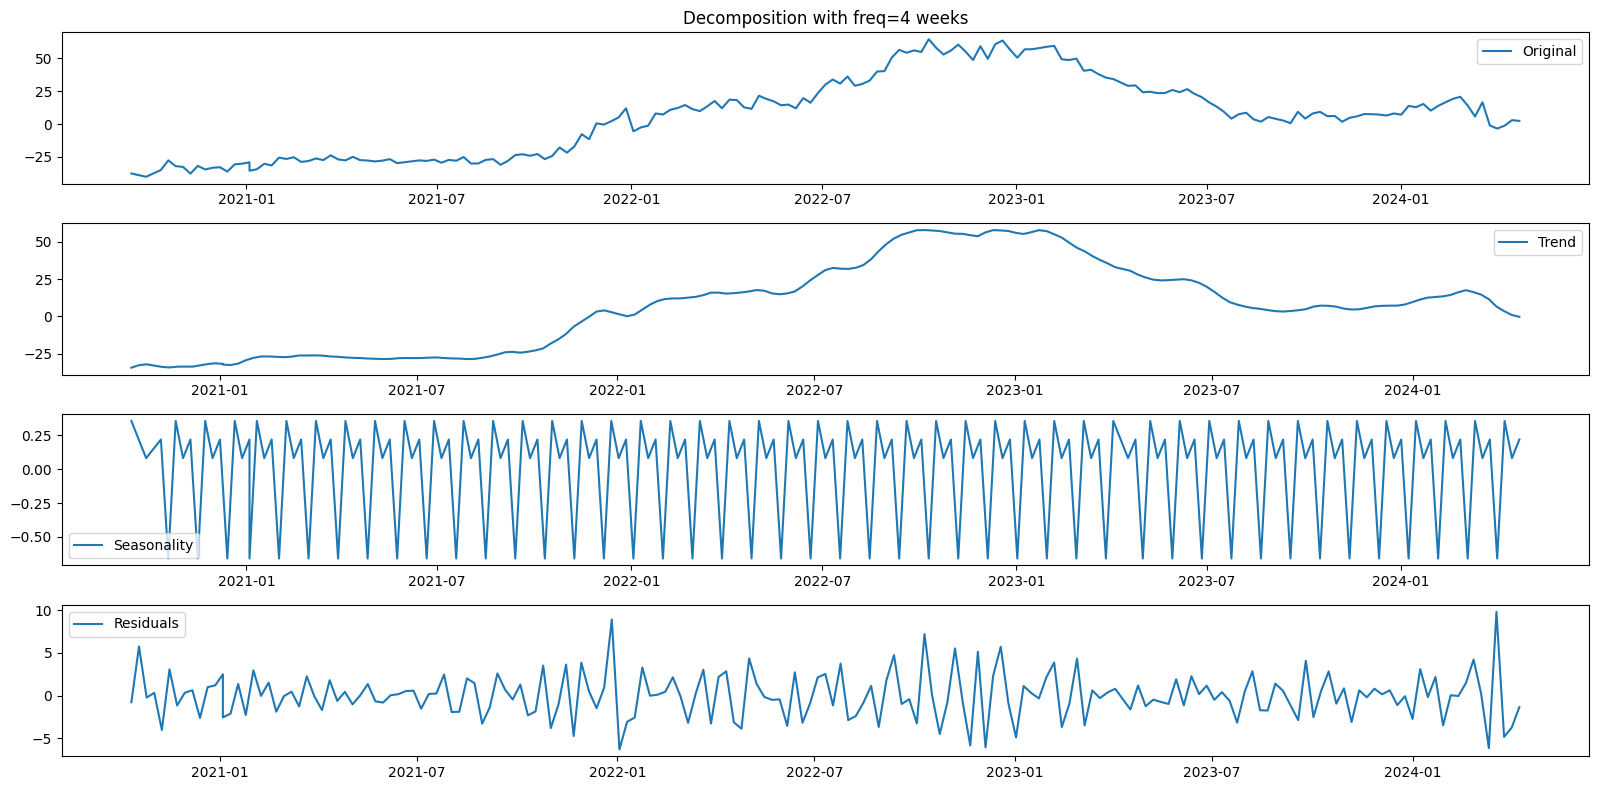

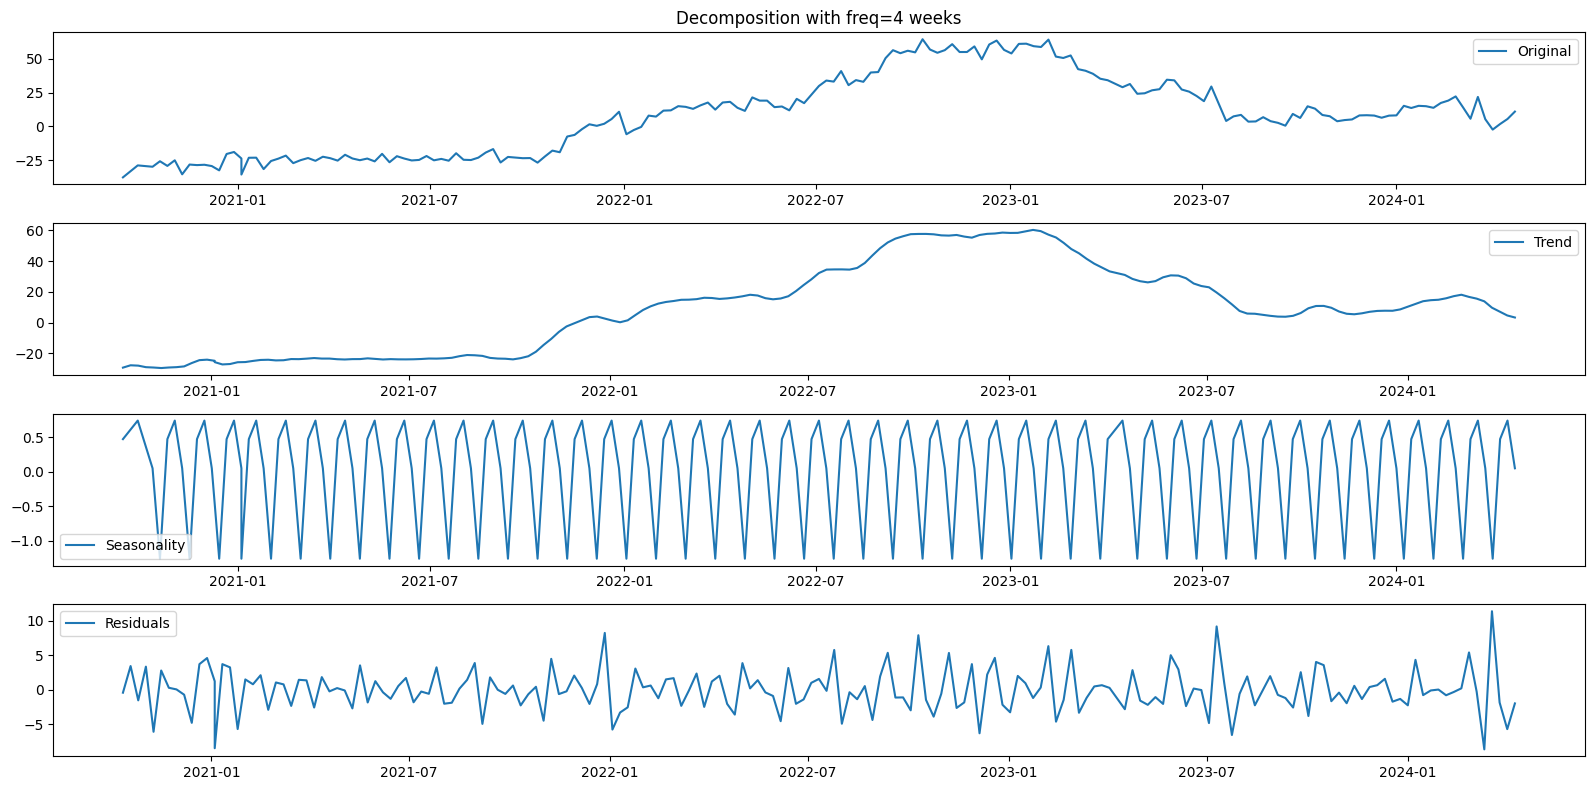

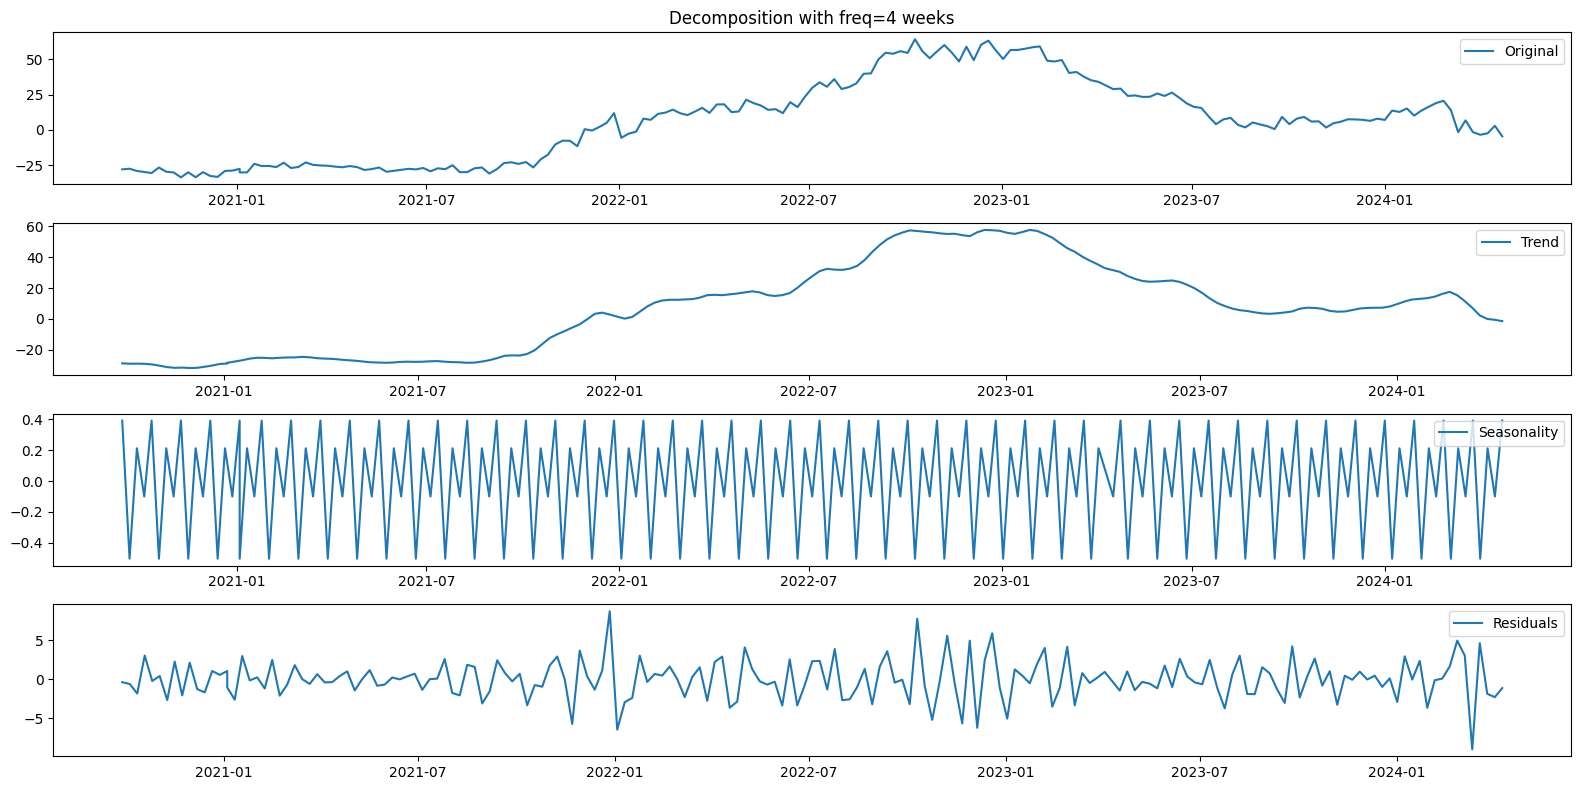

In [22]:
plot_decomposition(TS1_A2["wPreis"].dropna(), freq=4)
plot_decomposition(TS1_A1A2["wPreis"].dropna(), freq=4)
plot_decomposition(TS1_A2A3["wPreis"].dropna(), freq=4)

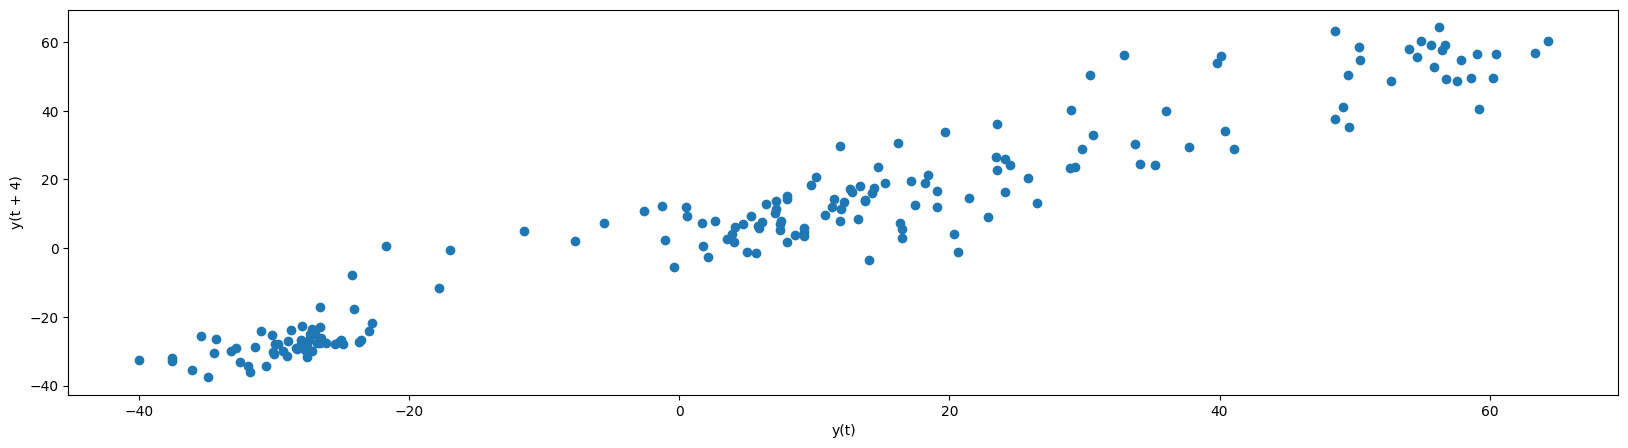

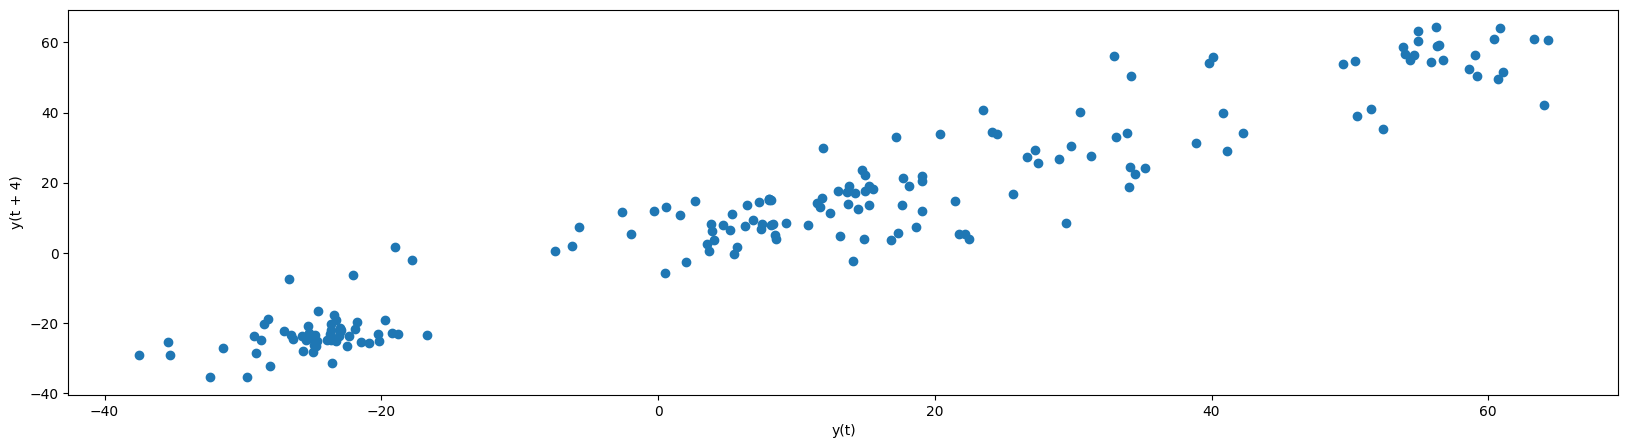

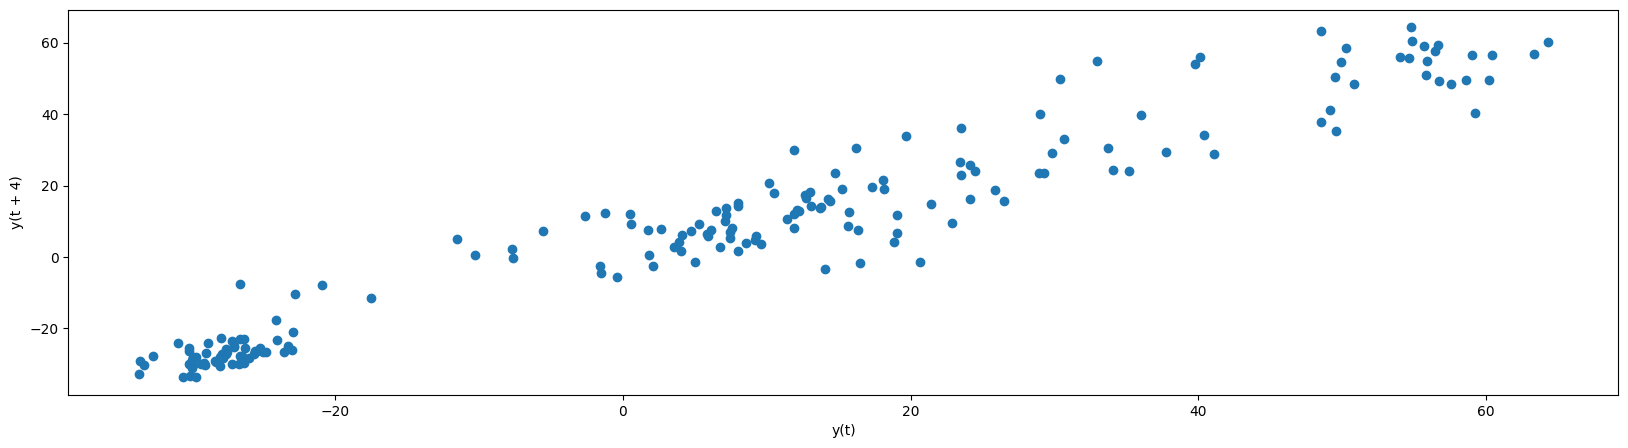

In [24]:
# Lag plot of LQC(coc_mpyn_prfr)
for dataset in datasets:
    plt.figure(figsize=(20,5))
    pd.plotting.lag_plot((dataset['wPreis']), lag= 4)

# Testing for Stationarity

In [25]:
from statsmodels.tsa.stattools import adfuller 

In [26]:
#Perform Dickey-Fuller test:
def test_stationarity(timeseries):    
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items(): # key, value mapping
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    if dftest[0] < dftest[4]["5%"]:
        print ("Reject Ho - Time Series is Stationary")
    else:
        print ("Failed to Reject Ho - Time Series is Non-Stationary")

In [27]:
for dataset in datasets:
    test_stationarity(dataset["wPreis"])


Results of Dickey-Fuller Test:
Test Statistic                  -1.378535
p-value                          0.592522
#Lags Used                       4.000000
Number of Observations Used    182.000000
Critical Value (1%)             -3.466800
Critical Value (5%)             -2.877555
Critical Value (10%)            -2.575308
dtype: float64
Failed to Reject Ho - Time Series is Non-Stationary
Results of Dickey-Fuller Test:
Test Statistic                  -1.420392
p-value                          0.572462
#Lags Used                       4.000000
Number of Observations Used    182.000000
Critical Value (1%)             -3.466800
Critical Value (5%)             -2.877555
Critical Value (10%)            -2.575308
dtype: float64
Failed to Reject Ho - Time Series is Non-Stationary
Results of Dickey-Fuller Test:
Test Statistic                  -1.503353
p-value                          0.531852
#Lags Used                       7.000000
Number of Observations Used    181.000000
Critical Value (1

# Differencing

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_8064/735318251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TS1_A2['wPreis_diff'] = TS1_A2['wPreis'].diff()


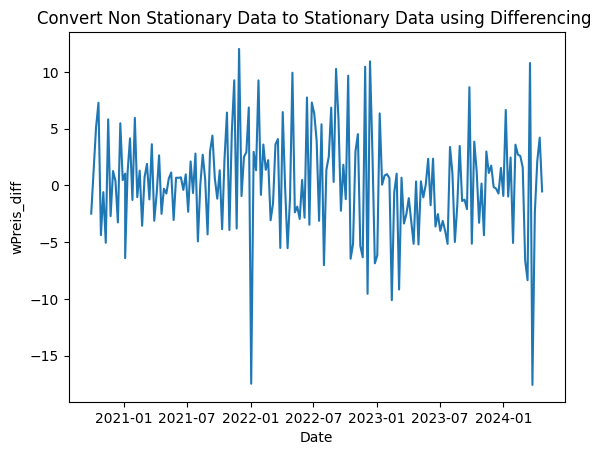

In [28]:
TS1_A2['wPreis_diff'] = TS1_A2['wPreis'].diff()
plt.xlabel('Date')
plt.ylabel('wPreis_diff')    
plt.title('Convert Non Stationary Data to Stationary Data using Differencing ')
plt.plot(TS1_A2['wPreis_diff'])

In [29]:
TS1_A2['wPreis_diff2'] = TS1_A2['wPreis_diff'].diff()

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_8064/92578211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TS1_A2['wPreis_diff2'] = TS1_A2['wPreis_diff'].diff()


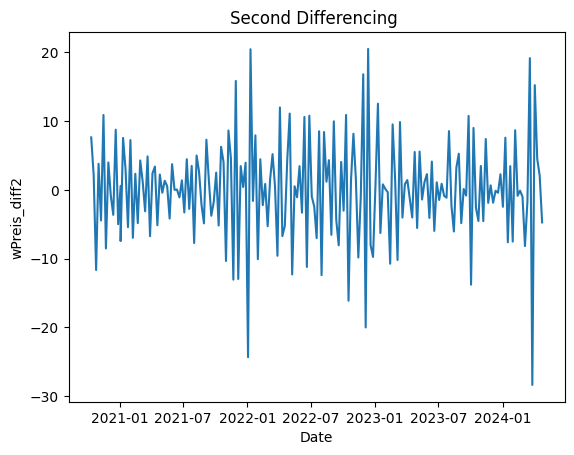

In [30]:
plt.xlabel('Date')
plt.ylabel('wPreis_diff2')    
plt.title('Second Differencing ')
plt.plot(TS1_A2['wPreis_diff2'])

In [31]:
TS1_A2.dropna(inplace = True)
test_stationarity(TS1_A2['wPreis_diff'])


Results of Dickey-Fuller Test:
Test Statistic                -5.870543e+00
p-value                        3.248068e-07
#Lags Used                     3.000000e+00
Number of Observations Used    1.810000e+02
Critical Value (1%)           -3.467005e+00
Critical Value (5%)           -2.877644e+00
Critical Value (10%)          -2.575355e+00
dtype: float64
Reject Ho - Time Series is Stationary


/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_8064/1823308034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TS1_A2.dropna(inplace = True)


In [32]:
TS1_A2.dropna(inplace = True)
test_stationarity(TS1_A2['wPreis_diff2'])


Results of Dickey-Fuller Test:
Test Statistic                -8.803148e+00
p-value                        2.085874e-14
#Lags Used                     8.000000e+00
Number of Observations Used    1.760000e+02
Critical Value (1%)           -3.468062e+00
Critical Value (5%)           -2.878106e+00
Critical Value (10%)          -2.575602e+00
dtype: float64
Reject Ho - Time Series is Stationary


/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_8064/2296587317.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TS1_A2.dropna(inplace = True)


We have made it stationary. Now we can start modeling.